# Assignment Python 2 - NYC SALES DATASET
### Nama : Muhammad Fernanda Naufal Fathoni
### Kode Peserta : PYTN-KS15-003

In [1]:
import numpy as np
import pandas as pd
import math
import statistics
import scipy.stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from IPython.core.display import Image
from IPython.display import Math, Latex
%matplotlib inline

Data yang digunakan adalah data NYC Sales dataset yang didownload pada link berikut : https://www.kaggle.com/datasets/new-york-city/nyc-property-sales Data tersebut adlaah catatan pembangunan apartement, dll yang terjual pada periode 12 bulan.

Data tersebut meliputi location, address, type, sale price, dan sale date of building units sold. Berikut kode referensi yang digunakan pada setiap field :

BOROUGH : Manhattan(1), Bronx(2), Brooklyn(3), Queens(4), dan Staten Island(5) BLOCK : Gabungan dari borough, block dan unique key biasa disebut BBL BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE : type building at various points in time KARENA INI DATA FINANCE TRANSACTION ADA BEBERAPA HAL YANG PERLU DIINGAT :

Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement. This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

### Data Loading

In [2]:
df = pd.read_csv('data/nyc-rolling-sales.csv')
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


### EDA & DATA CLEANING

In [3]:
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [5]:
# drop kolom unnamed: 0 krn tidak jelas kolom apa
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [7]:
#lihat jumlah baris dan kolom
df.shape

(84548, 21)

In [8]:
# Mengubah Kode pada kolom 'BOROUGH' sesuai dengan kode Manhattan(1), Bronx(2), Brooklyn(3), Queens(4), dan Staten Island(5)
df['BOROUGH'] = df.BOROUGH.replace({1: 'Manhattan', 2: 'Bronk', 3: 'Brooklyn',  4: 'Queens', 5: 'Staten Islands'})
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [9]:
# Mengubah tipe data pada setiap kolom yang tidak sesuai
numeric = ['SALE PRICE', "LAND SQUARE FEET",
        "GROSS SQUARE FEET"]
for coloumn in numeric:
    df[coloumn]=pd.to_numeric(df[coloumn], errors="coerce")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         84548 non-null  object 
 1   NEIGHBORHOOD                    84548 non-null  object 
 2   BUILDING CLASS CATEGORY         84548 non-null  object 
 3   TAX CLASS AT PRESENT            84548 non-null  object 
 4   BLOCK                           84548 non-null  int64  
 5   LOT                             84548 non-null  int64  
 6   EASE-MENT                       84548 non-null  object 
 7   BUILDING CLASS AT PRESENT       84548 non-null  object 
 8   ADDRESS                         84548 non-null  object 
 9   APARTMENT NUMBER                84548 non-null  object 
 10  ZIP CODE                        84548 non-null  int64  
 11  RESIDENTIAL UNITS               84548 non-null  int64  
 12  COMMERCIAL UNITS                

In [12]:
# Melihat jumlah missing value
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [13]:
# Drop missing value
df = df.dropna()

In [14]:
# cek ulang missing value
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [15]:
df.shape

(48244, 21)

In [16]:
#melihat nilai unique pada kolom 'BOROUGH'
df['BOROUGH'].unique()

array(['Manhattan', 'Bronk', 'Brooklyn', 'Queens', 'Staten Islands'],
      dtype=object)

Sebelum melakukan pengerjaan, dilakukan pengecekan outlier terlebih dahulu apakah persebaran datanya benar. Pada data tersebut dilakukan pengecekan outlier pada SALE PRICE karena data SALE PRICE yang akan digunakan.

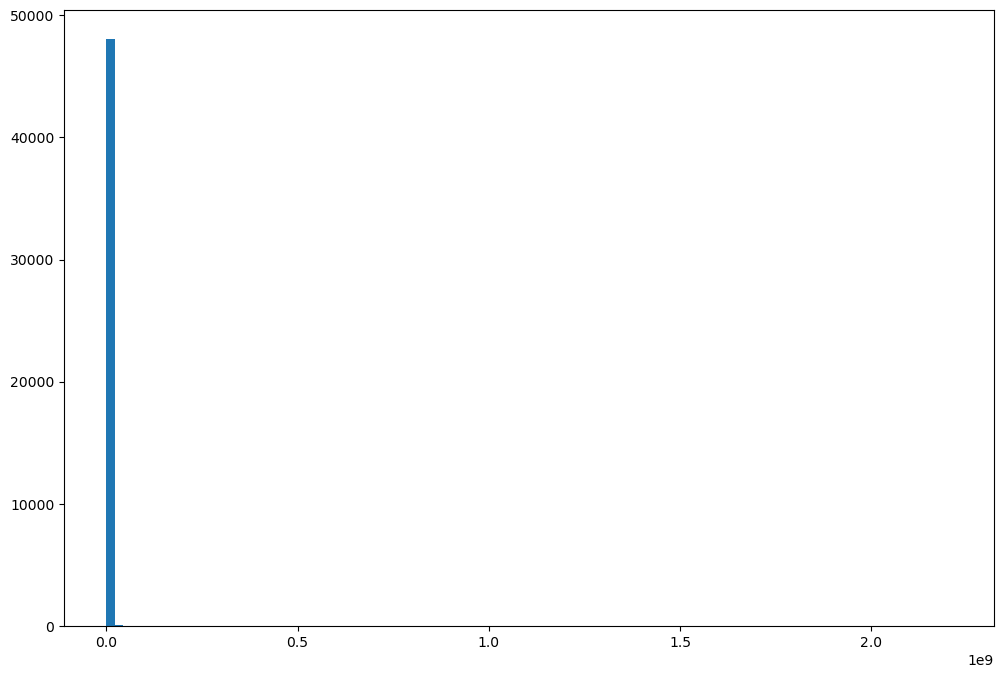

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df['SALE PRICE'],bins=100)
plt.show()

<Axes: >

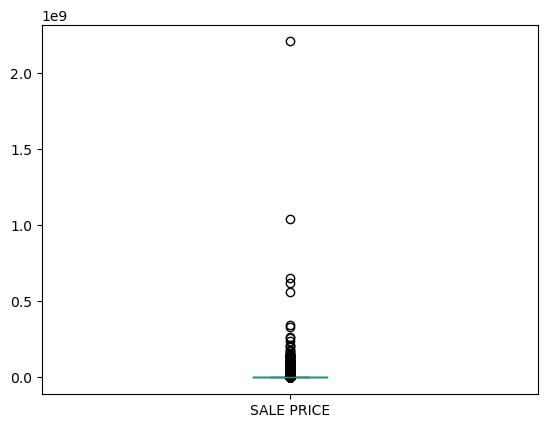

In [19]:
#plot box kolom SALE PRICE
df[['SALE PRICE']].plot.box()

Pada data diatas merupakan PLOT dari SALE PRICE, dimana pada plot tersebut terdapat banyak outlier. Maka harus dilakukan normalisasi supaya tidak ada outlier pada data tersebut. Untuk mencari outlier dilakukan perhitungan 'MEAN' 'Standart deviasi' dan menentukan limit atas dan bawah dari data tersebut menggunakan rumus.

In [20]:
#Menghitung nilai mean dari SALE PRICE
mean_saleprice = df['SALE PRICE'].mean()
print("Mean dari sale price adalah :", mean_saleprice)

Mean dari sale price adalah : 1153281.4458170964


In [21]:
# Standar deviasi dari SALE PRICE
std_saleprice = df['SALE PRICE'].std()
print("STD dari sale price adalah :", std_saleprice)

STD dari sale price adalah : 13401309.193582863


In [22]:
limit = 3*std_saleprice

In [24]:
# Menghitung limit atas dan bawah
limit_atas = mean_saleprice + 3*std_saleprice
limit_bawah = mean_saleprice - 3*std_saleprice

print("Limit atas =", limit_atas)
print("Limit bawah =", limit_bawah)

Limit atas = 41357209.026565686
Limit bawah = -39050646.13493149


In [25]:
#Menghitung data yang outlier pada limit bawah
(df['SALE PRICE'] < limit_bawah).sum()

0

In [26]:
#Menghitung data yang outlier pada limit atas
(df['SALE PRICE'] > limit_atas).sum()

110

Jumlah data yang outlier pada limit bawah adalah 0, dan yang outlier pada limit atas adalah 110

In [27]:
# Dilakukan filter pada data untuk membuang data yang outlier
new_df = df[(df['SALE PRICE']>limit_bawah) & (df['SALE PRICE'] < limit_atas)]

In [28]:
#melihat ulang apakah terdapat outlier pada limit atas
(new_df['SALE PRICE'] > limit_atas).sum()

0

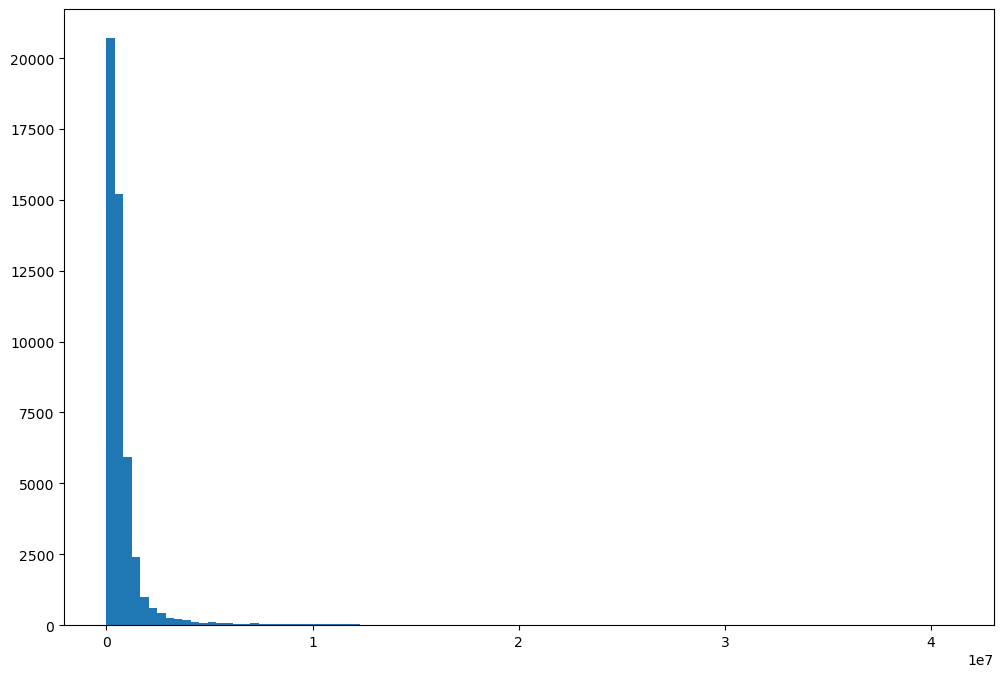

In [31]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(new_df['SALE PRICE'],bins=100)
plt.show()

In [33]:
new_df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00


In [35]:
df.shape

(48244, 21)

In [36]:
new_df.shape

(48134, 21)

### MEAN
##### Berapa rata rata sale price pada setiap borough dengan sale price tertinggi?

In [37]:
# slicing data borough dan sale price 
data = new_df.loc[:,['BOROUGH','SALE PRICE']]

data

,BOROUGH,SALE PRICE
0,Manhattan,6625000.0
3,Manhattan,3936272.0
4,Manhattan,8000000.0
6,Manhattan,3192840.0
9,Manhattan,16232000.0
...,...,...
84543,Staten Islands,450000.0
84544,Staten Islands,550000.0
84545,Staten Islands,460000.0
84546,Staten Islands,11693337.0


In [38]:
#group sale price & borough
df_borough = data.groupby("BOROUGH").mean().sort_values(by="SALE PRICE", ascending=False)
df_borough = df_borough
df_borough

,SALE PRICE
BOROUGH,
Manhattan,7.436279e+06
Queens,8.300806e+05
Brooklyn,7.322764e+05
Bronk,5.342953e+05
Staten Islands,5.286038e+05


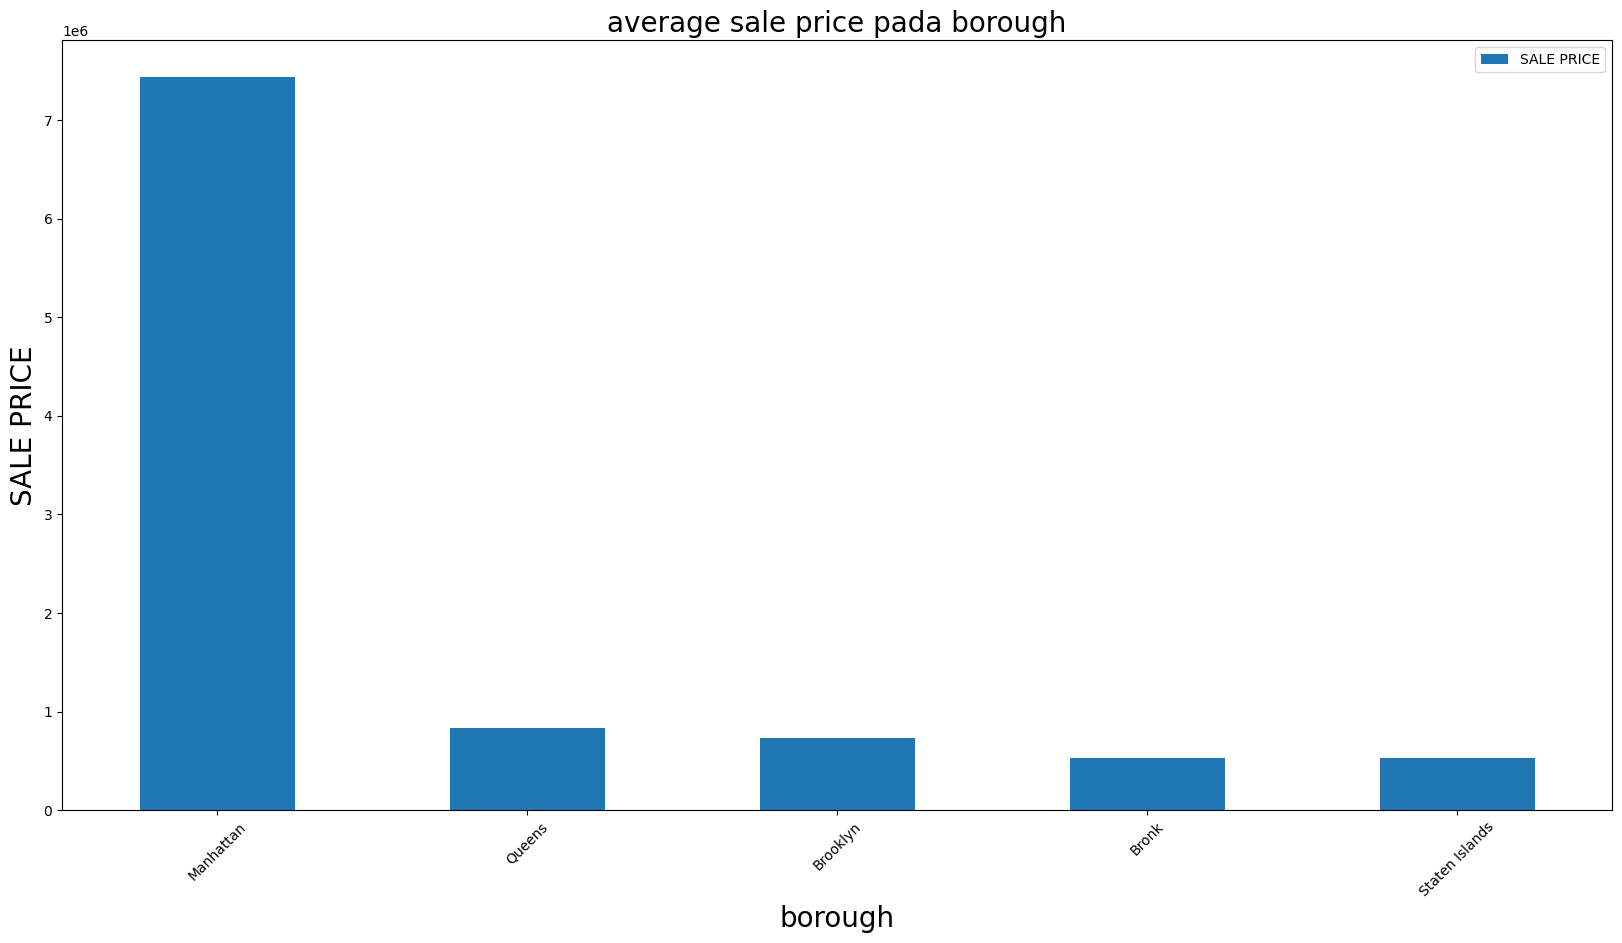

In [39]:
# inisiasi
df_borough.plot(kind = 'bar', 
                    figsize=(20,10), 
                    legend = True)

# membuat nama judul bar chart
plt.title("average sale price pada borough", fontsize = 20)
# membuat nama xlabel
plt.xlabel("borough", fontsize = 20)
# membuat nama ylabel
plt.ylabel("SALE PRICE", fontsize = 20)

plt.xticks(rotation = 45)

# menampilkan bar chart
plt.show()

Kesimpulan : Dari data diatas rata rata yang paling tinggi terletak di Manhattan

### MEDIAN
Median adalah nilai tengah dari sebuah data yang sudah diurutkan

#### Berapa  median sale price pada setiap borough diatas?


In [40]:
data.head()

,BOROUGH,SALE PRICE
0,Manhattan,6625000.0
3,Manhattan,3936272.0
4,Manhattan,8000000.0
6,Manhattan,3192840.0
9,Manhattan,16232000.0


In [41]:
df_median = data.groupby("BOROUGH").median().sort_values(by="SALE PRICE", ascending=False)
df_median

,SALE PRICE
BOROUGH,
Manhattan,5500000.0
Queens,635000.0
Staten Islands,485000.0
Brooklyn,420000.0
Bronk,270000.0


tabel diatas merupakan median sale price pada setiap borough

### Modus
Modus adalah nilai yang sering muncul
#### Apa modus dari kolom BUILDING CLASS CATEGORY?

In [42]:
# Slicing building class category coloumn
building_class_cat = new_df.loc[:,['BUILDING CLASS CATEGORY']]

building_class_cat

,BUILDING CLASS CATEGORY
0,07 RENTALS - WALKUP APARTMENTS
3,07 RENTALS - WALKUP APARTMENTS
4,07 RENTALS - WALKUP APARTMENTS
6,07 RENTALS - WALKUP APARTMENTS
9,08 RENTALS - ELEVATOR APARTMENTS
...,...
84543,02 TWO FAMILY DWELLINGS
84544,02 TWO FAMILY DWELLINGS
84545,02 TWO FAMILY DWELLINGS
84546,22 STORE BUILDINGS


In [43]:
building_class_cat.mode()

,BUILDING CLASS CATEGORY
0,01 ONE FAMILY DWELLINGS


Modus dari 'BUILDING CLASS CATEGORY' adalah ONE FAMILY DWELLINGS

### Range 
Range adalah selisih antara data terbesar dan terkecil

In [44]:
new_df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00


In [45]:
range_saleprice = np.ptp(new_df['SALE PRICE'])
print('Range dari "SALE PRICE" adalah ', range_saleprice)

Range dari "SALE PRICE" adalah  41000000.0


### Variance

In [46]:
variance_saleprice = statistics.variance(new_df['SALE PRICE'])
print('variance "SALE PRICE" adalah ', variance_saleprice)

variance "SALE PRICE" adalah  4273201319410.323


### Standart Deviation

In [47]:
stdev_saleprice = statistics.stdev(new_df['SALE PRICE'])
print('standart deviasi "SALE PRICE" adalah ', stdev_saleprice)

standart deviasi "SALE PRICE" adalah  2067172.3003683856


### Probability Distribution

In [48]:
new_df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00


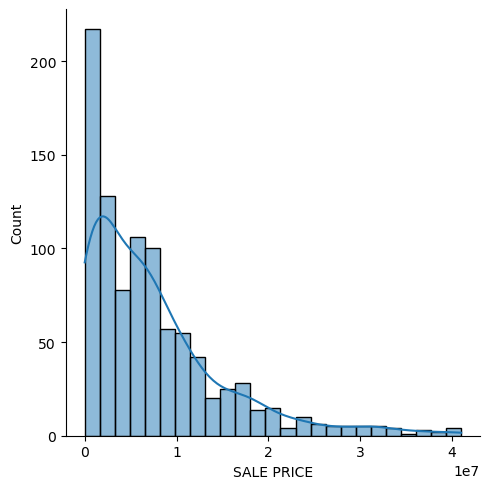

In [49]:
manhattan_dist = new_df[new_df['BOROUGH'] == 'Manhattan']['SALE PRICE']

ax = sns.displot(manhattan_dist, kde=True)

### Confidence Intervals

In [50]:
new_df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00


In [51]:
new_df.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})

SALE PRICE                     
                        mean           std   size
BOROUGH                                          
Bronk           5.342953e+05  1.755684e+06   7044
Brooklyn        7.322764e+05  1.578745e+06  24018
Manhattan       7.436279e+06  7.596896e+06    939
Queens          8.300806e+05  1.548672e+06  11069
Staten Islands  5.286038e+05  4.759543e+05   5064

Mengambil parameter yang diperlukan hanya untuk wilayah Bronk dan menghitung standard error serta lower class boundary dan upper boundary class dengan confidence level 95% (z = 1.96)

In [52]:
mean_bronk = 5.342953
std_bronk = 1.755684
total = 7044
z = 1.96

In [53]:
se = std_bronk/np.sqrt(total)
se

0.020918795660950458

In [54]:
lower_class = mean_bronk - z * se
upper_class = mean_bronk + z * se
print("The lower class boundary is", lower_class)
print("The upper class boundary is", upper_class)

The lower class boundary is 5.301952160504537
The upper class boundary is 5.3839538394954625


Dapat disimpulkan mean harga jual dari kota Bronk adalah antara 5.301952160504537 sampai 5.3839538394954625

### Hypotesis Testing
#### Apakah rata rata sale price pada manhattan dan bronk sama?

In [55]:
Manhattan = new_df[new_df["BOROUGH"] == "Manhattan"]
Bronk = new_df[new_df["BOROUGH"] == "Bronk"]

In [56]:
n1 = len(Manhattan)
mu1 = Manhattan["SALE PRICE"].mean()
sd1 = Manhattan["SALE PRICE"].std()

(n1, mu1, sd1)

(939, 7436279.412140575, 7596896.306345212)

In [57]:
sm.stats.ztest(Manhattan["SALE PRICE"].dropna(), Bronk["SALE PRICE"].dropna(),alternative='two-sided')

(64.4467400057657, 0.0)

p-value = 64.4467400057657 Karena p-value < alpha (0.05), maka H0 ditolak.

Sehingga kemungkinan besar, rata-rata "SALE PRICE" pada borough "Manhattan" tidak sama dengan "Bronk"